In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

cwd = os.getcwd()
ec_label1 = ['ICS', 'HCS']
ec_label2 = ['ics', 'hcs']

D = 2                   # dimensionality
L = 128                 # lineal size
lc = 16                 # correlation lenght
variance = [0.5, 2]
realizations = 128

map_realization = 97    # change to display different realizations [0..127]
v = 1                   # contrast [0.1 .. ]
cmap = 'plasma'         # 'plasma', 'viridis', 'cividis', 'Blues', etc.

norm=38.65

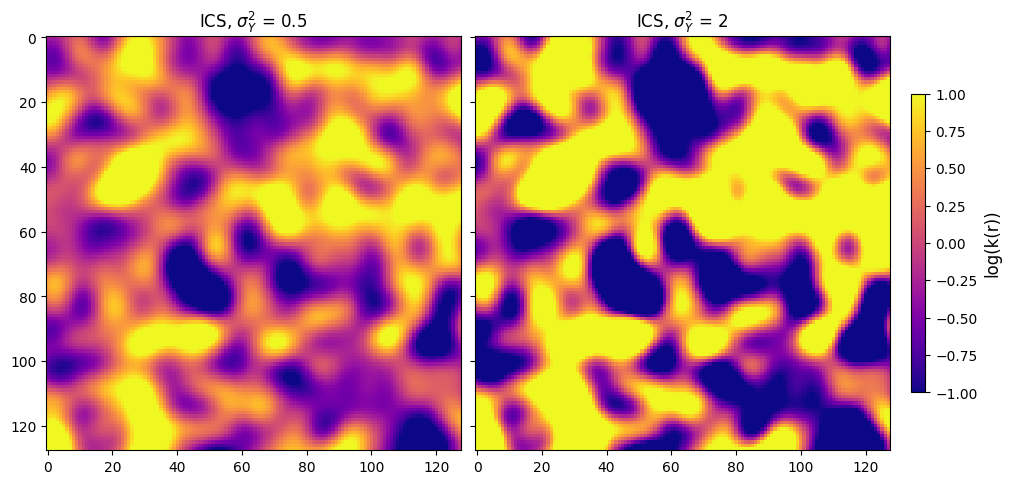

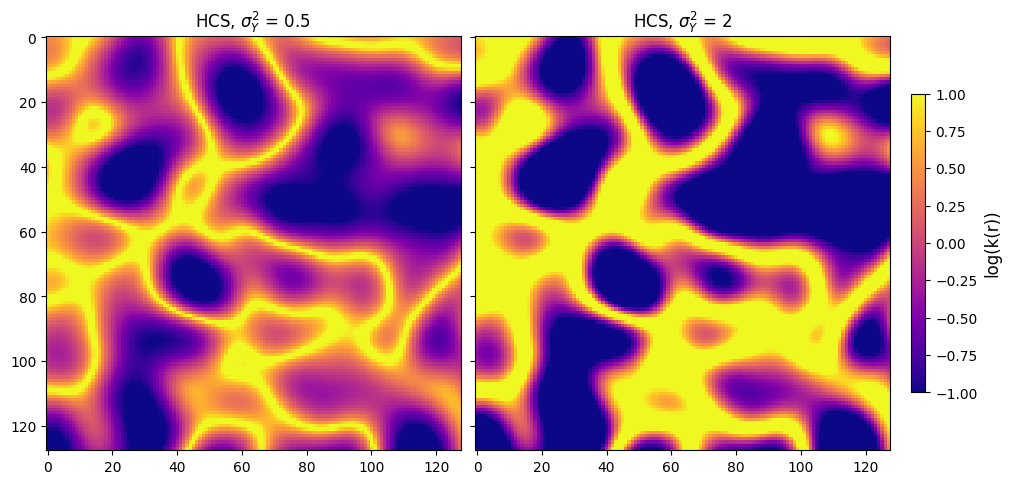

In [3]:
### Map visualization of log(K)

for ic in range(len(ec_label2)):
    fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(10, 20), sharey=True)
    for ivar in range(len(variance)):
        kmap = np.load(cwd + '/medios_128Lcont/X_128L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')[map_realization]
        im = ax[ivar].imshow(np.log(kmap), cmap=cmap, vmin=-v, vmax=v)
        ax[ivar].set_title(ec_label1[ic]+', '+r"$\sigma^2_{Y}$"+' = '+str(variance[ivar]), fontsize=12)
    cb = fig.colorbar(im, shrink=0.15, orientation='vertical', pad=0.05)#, ax=ax.ravel().tolist())
    cb.set_label(label='log(k(r))', fontsize=12)

In [ ]:
# Means fo ICS and HCS

k_ics = np.zeros(128)
k_hcs = np.zeros(128)
for ic in range(len(ec_label2)):
    for ireal in range(128):
        k = np.mean(np.load(cwd + '/medios_128Lcont/X_128L_' + ec_label2[ic] + '_' + '0.5' + '.npy')[ireal])
        if ic == 0:
            k_ics[ireal] = k
        else:
            k_hcs[ireal] = k

print(np.mean(k_ics))
print(np.mean(k_hcs))


1.2780353468357135
1.2906714487959685


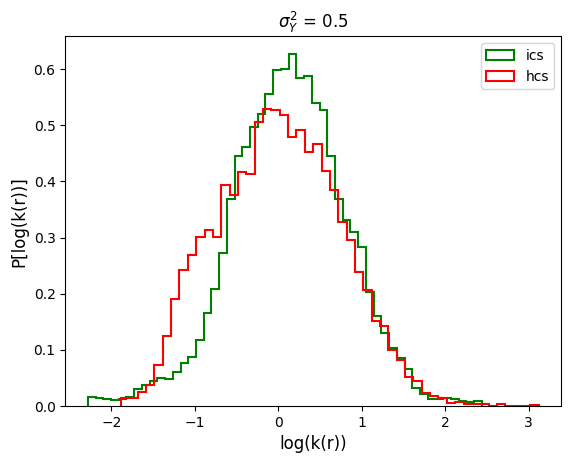

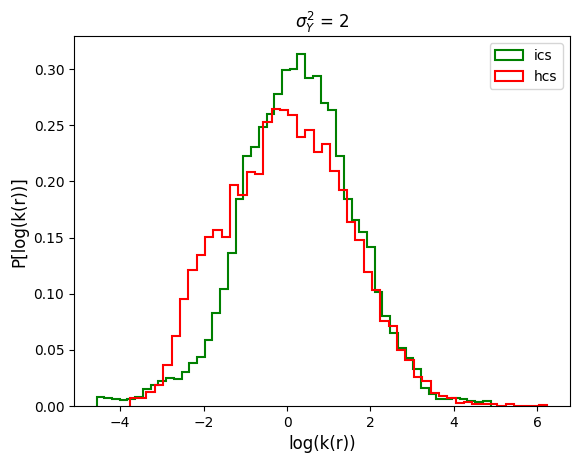

In [5]:
### PDFs of log(K)    
#      
color = ['g', 'r']
variance = ['0.5', '2']
for ivar in range(len(variance)):
    for ic in range(len(ec_label2)):
        kmap = np.load(cwd + '/medios_128Lcont/X_128L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')[map_realization]
        kmap = kmap.reshape(-1)
        plt.hist(np.log(kmap), bins='scott', density=True, histtype='step', color=color[ic], lw=1.5, label=ec_label2[ic])
        plt.xlabel('log(k(r))', fontsize=12)
        plt.ylabel('P[log(k(r))]', fontsize=12)
        plt.legend()
        plt.title(r"$\sigma^2_{Y}$" + ' = ' + str(variance[ivar]), fontsize=12)
    plt.show()

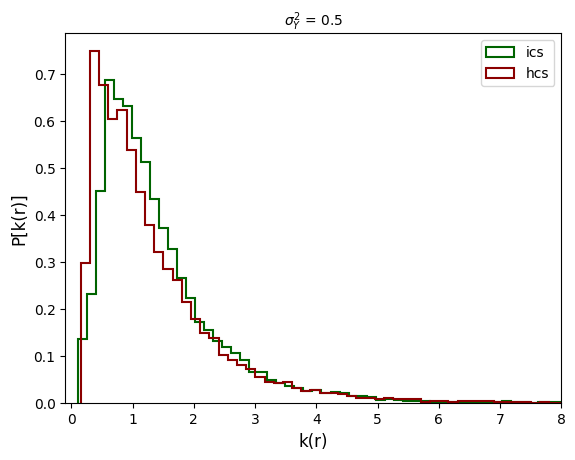

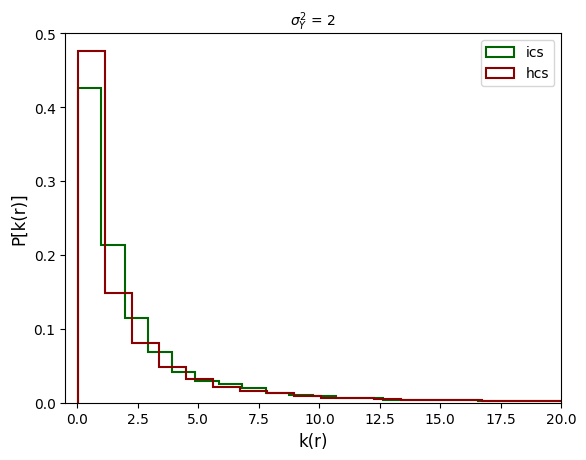

In [6]:
### PDFs of k 
#        
color = ['g', 'r']

color = ['darkgreen', 'darkred']
variance = ['0.5', '2']
xlim = [[-0.1, 8], [-0.5, 20]]

for ivar in range(len(variance)):
    for ic in range(len(ec_label2)):
        kmap = np.load(cwd + '/medios_128Lcont/X_128L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')[map_realization]
        kmap = kmap.reshape(-1)
        plt.hist(kmap, bins='scott', density=True, histtype='step', color=color[ic], lw=1.5, label=ec_label2[ic])
        plt.xlim(xlim[ivar])
        plt.xlabel('k(r)', fontsize=12)
        plt.ylabel('P[k(r)]', fontsize=12)
        plt.legend()
        plt.title(r"$\sigma^2_{Y}$" + ' = ' + str(variance[ivar]), fontsize=10)
    plt.show()

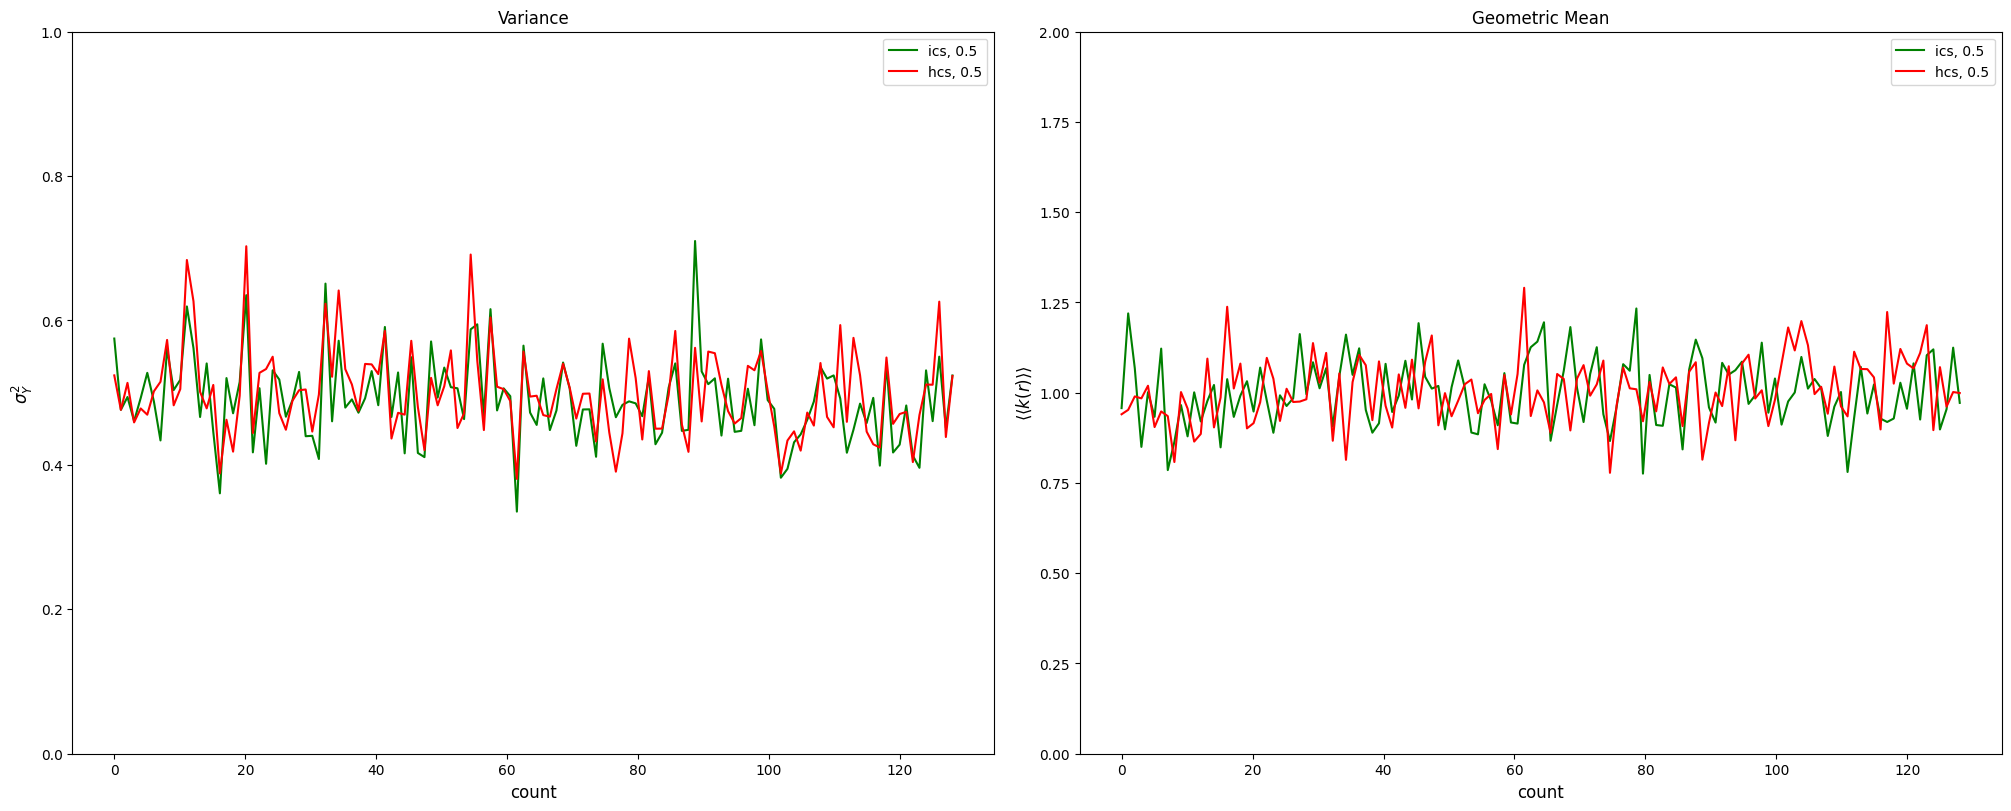

In [7]:
### Variance and mean plots

x_sim = np.linspace(0, 128, 128)
color = ['g', 'r']
variance = ['0.5']
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(20,8), sharey=False)
for ic in range(len(ec_label2)):
    
    for ivar in range(len(variance)):
        var = np.array([])
        mean = np.array([])
        kmap = np.load(cwd + '/medios_128Lcont/X_128L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')
        for ireal in range(128):
            var = np.append(var, np.var(np.log(kmap[ireal])))
            mean = np.append(mean, np.exp(np.mean(np.log(kmap[ireal]))))
            
        ax[0].plot(x_sim, var, label=ec_label2[ic] + ', ' + str(variance[ivar]), color=color[ic])
        ax[0].legend(loc='best', fontsize=10)
        ax[0].set_xlabel('count', fontsize=12)
        ax[0].set_ylabel(r"$\sigma^2_{Y}$", fontsize=12)
        ax[0].set_ylim(0,1)
        ax[0].set_title('Variance')
     
        ax[1].plot(x_sim, mean, label=ec_label2[ic] + ', ' + str(variance[ivar]), color=color[ic])
        ax[1].legend(loc='best', fontsize=10)
        ax[1].set_xlabel('count', fontsize=12)
        ax[1].set_ylabel(r'$⟨⟨k(r)⟩⟩$', fontsize=12)
        ax[1].set_ylim(0,2)
        ax[1].set_title('Geometric Mean')


1.2742200948297977
1.293639586493373


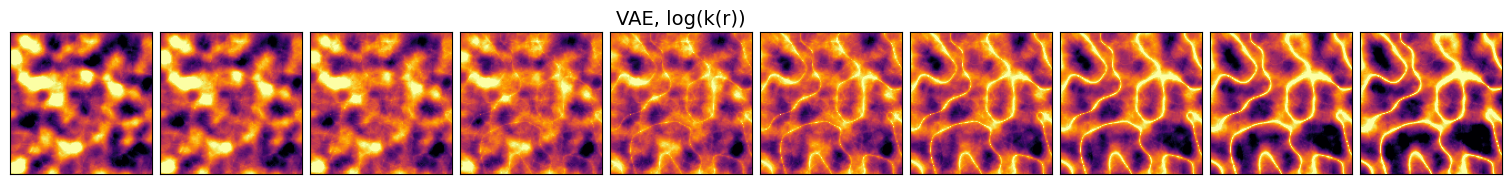

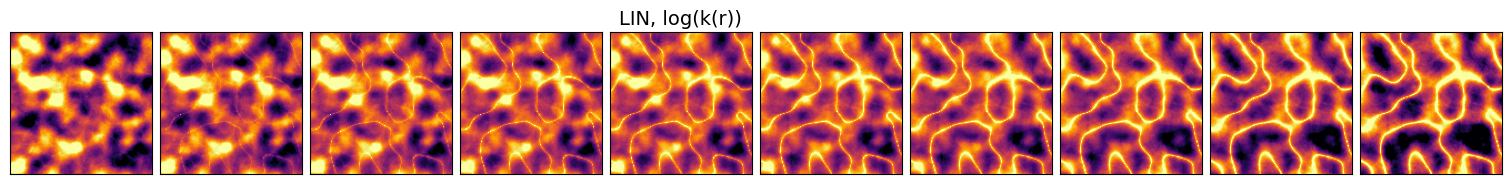

In [12]:
### Plot log(k(r)) output VAE LIN



vae = np.load(cwd + '/medios_128Lcont/output/output_vae_128x128.npy')
lin = np.load(cwd + '/medios_128Lcont/output/output_lin_128x128.npy')

method = [vae, lin]
label = ['VAE', 'LIN']

cmap = 'inferno'
v = 1

for imet in range(len(method)):
    fig, ax = plt.subplots(1, 10, figsize=(15,15), sharey=True, layout = 'constrained')
    for ireal in range(10):
        ax[ireal].imshow(np.log((norm*method[imet])[ireal]), vmin=-1, vmax=1, cmap=cmap)
        ax[ireal].set_yticks([])
        ax[ireal].set_xticks([])
        ax[4].set_title(label[imet] + ', log(k(r))', fontsize=14)

print(np.mean(method[0][0])*norm)
print(np.mean(method[0][9])*norm)

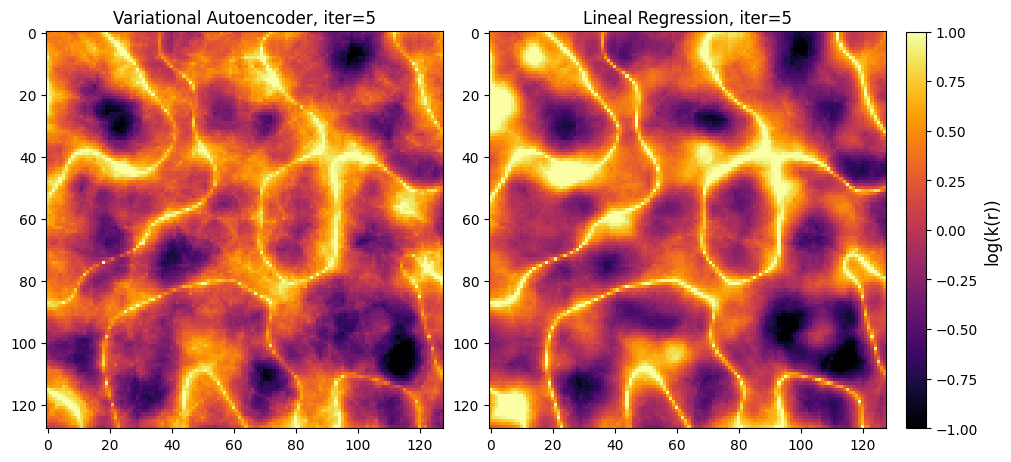

In [13]:
### Output VAE LIN 64x64

vae = np.load(cwd + '/medios_128Lcont/output/output_vae_128x128.npy')
lin = np.load(cwd + '/medios_128Lcont/output/output_lin_128x128.npy')

iter = 5

method = [vae, lin]

fig, ax = plt.subplots(1, 2, figsize=(10,10), layout='constrained')
for imet in range(len(method)):
    k = np.log((norm*method[imet])[iter])
    im = ax[imet].imshow(k, vmin=-v, vmax=v, cmap=cmap)
    ax[0].set_title('Variational Autoencoder, ' + 'iter=' + str(iter))
    ax[1].set_title('Lineal Regression, ' + 'iter=' + str(iter))
cb = fig.colorbar(im, shrink=.4)
cb.set_label(label='log(k(r))', fontsize=12)

[0.05576913 0.09486815 0.12967241 0.14924344 0.15462047 0.15131557
 0.14291048 0.12110135 0.08776364 0.04924165]
[0.05576913 0.09378561 0.1182188  0.13321091 0.14040428 0.14038342
 0.13300592 0.1173466  0.09120354 0.04924165]
[0.59263885 0.52681279 0.46755055 0.4174329  0.39517018 0.40511909
 0.44806632 0.50373477 0.56717008 0.63745028]
[0.59263885 0.52944815 0.49018866 0.46713194 0.45782205 0.4615249
 0.47847056 0.50998348 0.55960226 0.63745028]
[0.35122079 0.27753174 0.21860352 0.17425023 0.15615948 0.16412148
 0.20076343 0.25374874 0.32168192 0.40634283]
[0.35122079 0.28031534 0.24028492 0.21821225 0.20960104 0.21300524
 0.22893408 0.26008314 0.3131547  0.40634283]


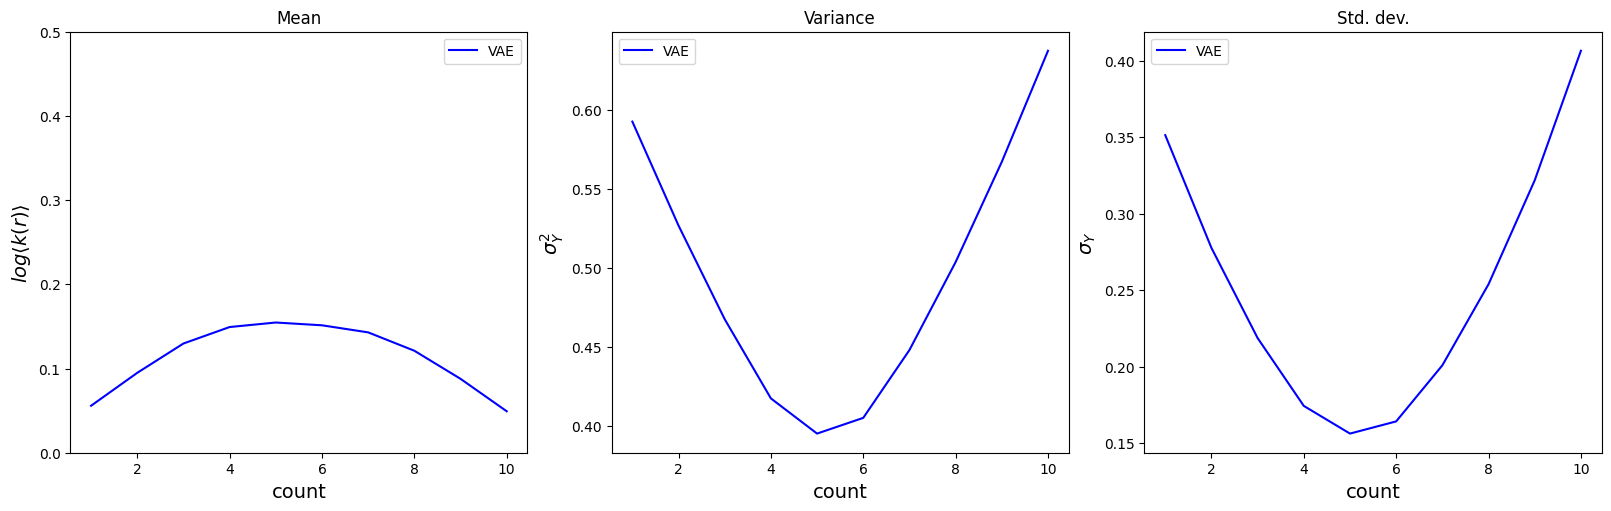

In [14]:
### Statistics 128x128

vae = np.load(cwd + '/medios_128Lcont/output/output_vae_128x128.npy')
lin = np.load(cwd + '/medios_128Lcont/output/output_lin_128x128.npy')

vae_mean, vae_std, vae_var = [],[],[]
lin_mean, lin_std, lin_var = [],[],[]

x_real = np.linspace(1, 10, 10)

for ireal in range(10):
    vae_mean = np.append(vae_mean, np.mean(np.log(vae[ireal]*norm)))
    vae_std =  np.append(vae_std, np.std(np.log(vae[ireal])))
    vae_var = np.append(vae_var, np.var(np.log(vae[ireal])))

    lin_mean = np.append(lin_mean, np.mean(np.log(lin[ireal]*norm)))
    lin_std =  np.append(lin_std, np.std(np.log(lin[ireal])))
    lin_var = np.append(lin_var, np.var(np.log(lin[ireal])))

metrics_vae = [vae_mean, vae_std, vae_var]
metrics_lin = [lin_mean, lin_std, lin_var]

title = ['Mean', 'Variance', 'Std. dev.']
ylabel = [r'$log ⟨k(r)⟩$', r"$\sigma^2_{Y}$", r"$\sigma_{Y}$"]

fix, ax = plt.subplots(1, 3, figsize=(16,5), layout='constrained', sharey=False)
for i in range(3):
    ax[i].plot(x_real, metrics_vae[i], color='b', label='VAE')
    #ax[i].plot(x_real, metrics_lin[i], color='g', label='LIN')
    ax[i].legend()
    ax[i].set_title(title[i])
    ax[i].set_ylabel(ylabel[i], fontsize=14)
    ax[i].set_xlabel('count', fontsize=14)
    ax[0].set_ylim(0,0.5)

print(metrics_vae[0])
print(metrics_lin[0])
print(metrics_vae[1])
print(metrics_lin[1])
print(metrics_vae[2])
print(metrics_lin[2])


    #### normalizar los estadios intermedios con la media aritmetica, todas la estapas intermedias deben tener la misma media, la conectividad debe aumentar de forma continua.
    #### Binarizar, y sacar indicadores. 

    # Graficar: 


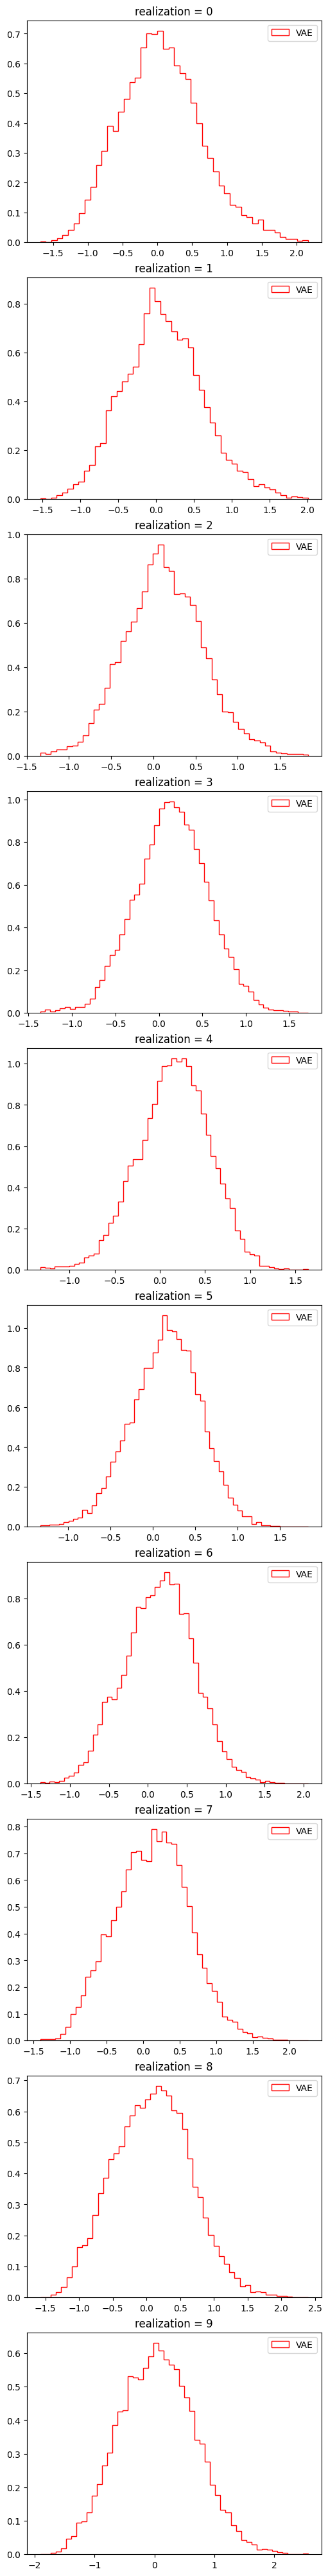

In [15]:
### PDFs 128x128 output LIN VAE

vae = np.load(cwd + '/medios_128Lcont/output/output_vae_128x128.npy')
lin = np.load(cwd + '/medios_128Lcont/output/output_lin_128x128.npy')

fig, ax = plt.subplots(10, 1, figsize=(5,40), sharex=False, layout = 'constrained')

for ireal in range(10):
    ax[ireal].hist(np.log(38.65*vae[ireal]).reshape(-1), bins='scott', density=True, histtype='step', color='red', label='VAE')
    
    #ax[ireal].hist(np.log(38.65*lin[ireal]).reshape(-1), bins='scott', density=True, histtype='step', color='blue', label='LIN')

    ax[ireal].set_title('realization = ' + str(ireal))
    #ax[ireal].set_xlim([0, 0.2])
    ax[ireal].legend()

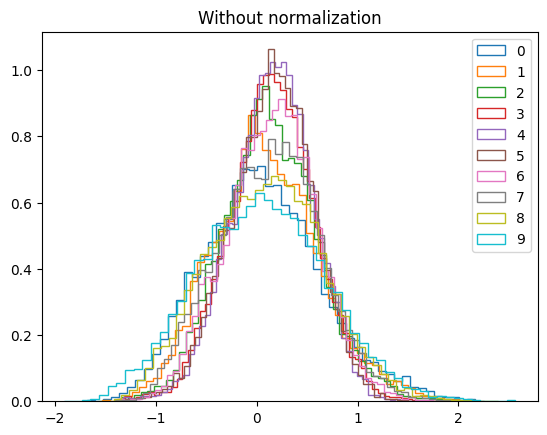

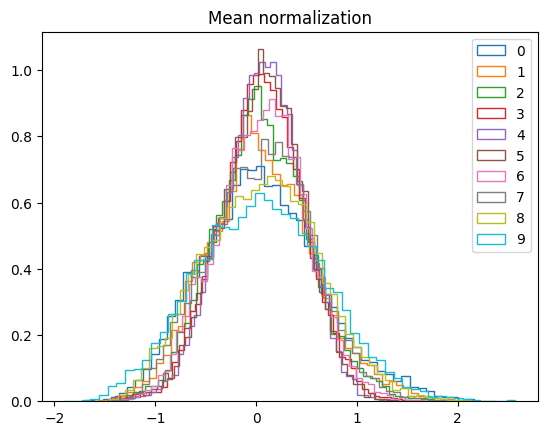

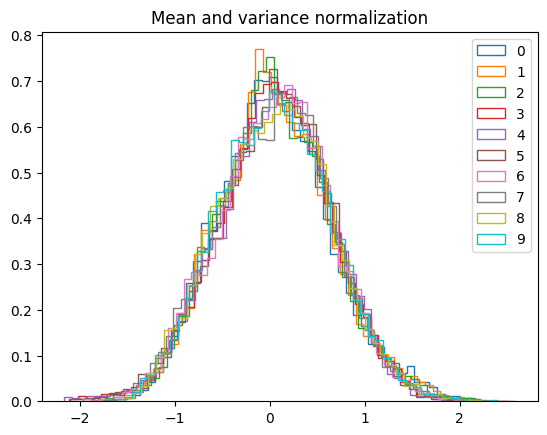

In [ ]:
### PDFs 128x128 output LIN VAE

vae = np.load(cwd + '/medios_128Lcont/output/output_vae_128x128.npy')
lin = np.load(cwd + '/medios_128Lcont/output/output_lin_128x128.npy')

#fig, ax = plt.subplots(10, 1, figsize=(5,40), sharex=False, layout = 'constrained')

mean_0 = np.mean(np.log(38.65*vae[0]))   
mean_5 = np.mean(np.log(38.65*vae[5]))
mean_9 = np.mean(np.log(38.65*vae[9]))

std_0 = np.std(np.log(38.65*vae[0]))   
std_5 = np.std(np.log(38.65*vae[5]))
std_9 = np.std(np.log(38.65*vae[9]))

# Without normalization
for ireal in range(10):
    plt.hist(np.log(38.65*vae[ireal]).reshape(-1), bins='scott', density=True, histtype='step', label=str(ireal))
    plt.title('Without normalization')
plt.legend()
plt.show()

# Mean normalization
for ireal in range(10):
    mean = np.mean(np.log(38.65*vae[ireal]))
    plt.hist((np.log(38.65*vae[ireal]).reshape(-1))-mean+mean_0, bins='scott', density=True, histtype='step', label=str(ireal))
    plt.title('Mean normalization')
plt.legend()
plt.show()

# Mean and variance normalization
for ireal in range(10):
    mean = np.mean(np.log(38.65*vae[ireal]))
    std =  np.std(np.log(38.65*vae[ireal]))
    plt.hist((((((np.log(38.65*vae[ireal]).reshape(-1))-mean)/std)*std_0)+mean_0), bins='scott', density=True, histtype='step', label=str(ireal))
    plt.title('Mean and variance normalization')
plt.legend()
plt.show() 
 

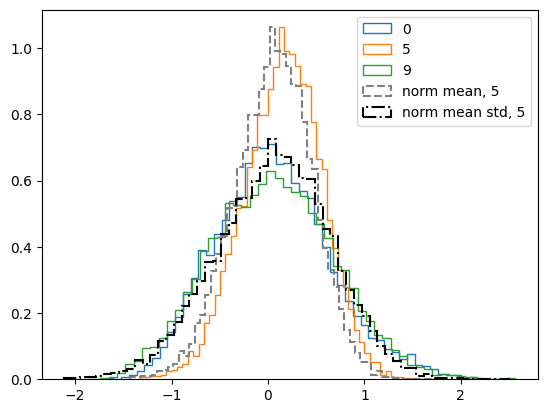

In [ ]:
plt.hist(np.log(38.65*vae[0]).reshape(-1), bins='scott', density=True, histtype='step', label=str(0))
plt.hist(np.log(38.65*vae[5]).reshape(-1), bins='scott', density=True, histtype='step', label=str(5))

plt.hist(np.log(38.65*vae[9]).reshape(-1), bins='scott', density=True, histtype='step', label=str(9))

mean_0 = np.mean(np.log(38.65*vae[0]))   
mean_5 = np.mean(np.log(38.65*vae[5]))
mean_9 = np.mean(np.log(38.65*vae[9]))

std_0 = np.std(np.log(38.65*vae[0]))   
std_5 = np.std(np.log(38.65*vae[5]))
std_9 = np.std(np.log(38.65*vae[9]))

plt.hist((np.log(38.65*vae[5]).reshape(-1))-mean_5+mean_0, bins='scott', density=True, histtype='step', label='norm mean, ' + str(5), color='grey', linestyle='--', linewidth=1.5)
plt.hist((((((np.log(38.65*vae[5]).reshape(-1))-mean_5)/std_5)*std_0)+mean_0), bins='scott', density=True, histtype='step', label='norm mean std, ' + str(5), color='black', linestyle='-.', linewidth=1.5)

plt.legend()

In [ ]:
# Separate into individual matrix of 128x128 for flow simulation

import numpy as np
import os

# Save in a separate numpy file each k map (VAE)
vae = np.load(cwd + '/medios_128Lcont/output/output_vae_128x128.npy')

parent_folder = ['for_sim_norm/vae', 'for_sim_norm_bin/lin']

# kmap_vae = [vae[i] for i in range(10)]
# kmap_lin = [lin[i] for i in range(10)]

mean_0 = np.mean(np.log(38.65*vae[0]))   
mean_5 = np.mean(np.log(38.65*vae[5]))
mean_9 = np.mean(np.log(38.65*vae[9]))

std_0 = np.std(np.log(38.65*vae[0]))   
std_5 = np.std(np.log(38.65*vae[5]))
std_9 = np.std(np.log(38.65*vae[9]))


for i in range(10):
    mean = np.mean(np.log(38.65*vae[ireal]))
    std =  np.std(np.log(38.65*vae[ireal]))
    os.makedirs(os.path.join(parent_folder[0], str(i)), exist_ok=True)

    np.save(os.path.join(parent_folder[0], str(i), f'k.npy'), 
            (((((38.65*vae[i])-mean)/std)*std_0)+mean_0).reshape(128,128,1)) # kmap normalized
        
        #np.save(os.path.join(parent_folder[j], str(i), f'k.npy'), (38.65*vae[i]).reshape(128, 128, 1)) #without normalization

# Save in a separate numpy file each k map (LIN)
lin = np.load(cwd + '/medios_128Lcont/output/output_lin_128x128.npy')

mean_0_l = np.mean(np.log(38.65*lin[0]))   
mean_5_l = np.mean(np.log(38.65*lin[5]))
mean_9_l = np.mean(np.log(38.65*lin[9]))

std_0_l = np.std(np.log(38.65*lin[0]))   
std_5_l = np.std(np.log(38.65*lin[5]))
std_9_l = np.std(np.log(38.65*lin[9]))

for i in range(10):
    mean_l = np.mean(np.log(38.65*lin[ireal]))
    std_l =  np.std(np.log(38.65*lin[ireal]))
    os.makedirs(os.path.join(parent_folder[1], str(i)), exist_ok=True)

    np.save(os.path.join(parent_folder[1], str(i), f'k.npy'), 
            (((((38.65*lin[i])-mean_l)/std_l)*std_0_l)+mean_0_l).reshape(128,128,1)) # kmap normalized


0.11693288071193089
0.11675135433645581
0.11701733802299737
0.11206957764723928
0.11193870060914161
0.11210782973158695


/tmp/ipykernel_3841/2732592563.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kdis_v[ireal] = norm*kdis
/tmp/ipykernel_3841/2732592563.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kave_v[ireal] = norm*kave


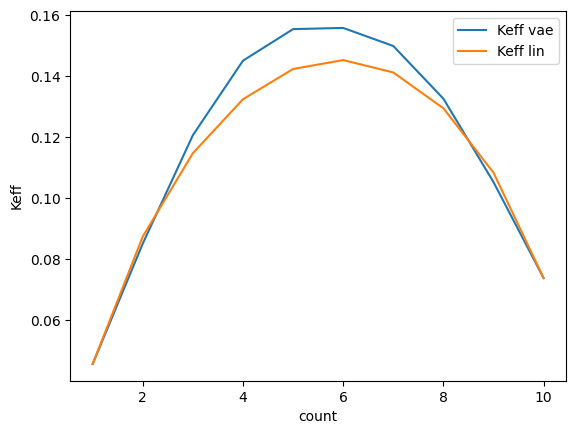

In [4]:
### Keff 128x128 without normalization

cwd = os.getcwd()
subdir = ['/medios_128Lcont/post_sim/']
output_folders = ['vae', 'lin']#, 'vae_norm']

x_real = np.linspace(1, 10, 10)

for folder in output_folders:
    keff_v = np.zeros(10)
    kdis_v = np.zeros(10)
    kave_v = np.zeros(10)
    for ireal in range(10):
        keff = np.loadtxt(cwd + subdir[0] + folder + '/' + str(ireal) + '/SolverRes.txt')[0]
        kdis = np.load(cwd + subdir[0] + folder + '/' + str(ireal) + '/KpostProcess/Kd128.npy')
        kave = np.load(cwd + subdir[0] + folder + '/' + str(ireal) + '/KpostProcess/Kv128.npy')
        
        keff_v[ireal] = norm*keff
        kdis_v[ireal] = norm*kdis
        kave_v[ireal] = norm*kave

    print(np.mean(np.log(keff_v)))
    print(np.mean(np.log(kdis_v)))
    print(np.mean(np.log(kave_v)))

    plt.plot(x_real, np.log(keff_v), label='Keff' + ' ' + folder)
    #plt.plot(x_real, np.log(kdis_v), color='g', label='Kdis' + ' ' + folder)
    #plt.plot(x_real, np.log(kave_v), color='b', label='Kave' + ' ' + folder)

    plt.xlabel('count')
    plt.ylabel('Keff')
    
    plt.legend()
plt.show()

#print(keff_v)
#print(kdis_v)
#print(kave_v)

In [ ]:
cwd = os.getcwd()
output_folders = ['lin', 'lin_bin', 'vae', 'vae_bin', 'vae_connect']
output_folders_1 = ['lin', 'lin_bin', 'vae', 'vae_bin']
subdir = ['/for_sim/', '/for_sim_norm/', '/post_sim/']

cmap = 'inferno'
v = 1

for folder in output_folders_1:
    fig, ax = plt.subplots(1, 10, figsize=(15,15), sharey=True, layout = 'constrained')
    for ireal in range(10):
        kmap = np.load(cwd + subdir[1] + folder + '/' + str(ireal) + '/k.npy')
        
        ax[ireal].imshow(np.log(kmap), vmin=-v, vmax=v, cmap=cmap)
        ax[ireal].set_yticks([])
        ax[ireal].set_xticks([])
        ax[4].set_title(folder + ', log(k(r))', fontsize=14)



In [ ]:
cwd = os.getcwd()
output_folders = ['lin', 'lin_bin', 'vae', 'vae_bin', 'vae_connect']

cmap = 'inferno'
v = 1

for folder in output_folders:
    fig, ax = plt.subplots(1, 10, figsize=(15,15), sharey=True, layout = 'constrained')
    for ireal in range(10):
        kmap = np.load(cwd + '/post_sim/' + folder + '/' + str(ireal) + '/k.npy')
        
        ax[ireal].imshow(np.log(kmap), vmin=-v, vmax=v, cmap=cmap)
        ax[ireal].set_yticks([])
        ax[ireal].set_xticks([])
        ax[4].set_title(folder + ', log(k(r))', fontsize=14)


In [ ]:
### Sacar LIN y realizar normalización por media y varianza. Hacerlo también en gráficos de transición, solo para VAE.
### Graficar Kperm vs realization en VAE, comparar con Kdiss y Kaver.

### Binarizar, y sacar indicadores de conect, Revisar Carrerar and Knubdy 2005.... pc = 0.31 para 3D y 0.59 para 2D. HACER.

### Ver ruido, cambiar bins, graficar mapas. 

### Normalizar salidas de VAE y luego correr simulador. HECHO no hay diferencia!.

### Sacar flujo al metodo lineal y graficar.


###....Porque el aumento de Keff debe ser lineal?? pensar en reordenamiento, si todos los canales de Keff fueran paralelos al flujo la Keff seria mucho mayor.
###...pensar de rotar los medios para ver como queda Keff.


### vae Ok 
### vae connect OK
### lin OK
### vae bin OK
### lin bin ok

### vae norm ok
### vae norm connect running

